In [2]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.1.6.2 requires h5py~=2.7, but you have h5py 3.6.0 which is incompatible.
deeplabcut 2.1.6.2 requires matplotlib==3.0.3, but you have matplotlib 3.1.1 which is incompatible.
deeplabcut 2.1.6.2 requires numpy==1.16.4, but you have numpy 1.21.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [4]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [5]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [6]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

In [7]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

print(ophys_experiments.columns)

ophys_experiments.head()

Total number of ophys experiments: 1941

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920


#### Male Familiar

In [8]:
plsmales1 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales2 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsmales3 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales4 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# males familiar total is plsmales1 + plsmales2 + plsmales3 + plsmales4
plsmalesf = pd.concat([plsmales1, plsmales2], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales3], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales4], axis=0)
            
plsmalesf.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
961283857,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,174.0,Sst-IRES-Cre,GCaMP6f,2.0,...,957024596,VisualBehavior,290,VISp,2019-10-04 21:12:37.000000,OPHYS_2_images_A_passive,Familiar,True,A,961328900
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175
1081264133,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027847,VisualBehaviorMultiscope,306,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144562
1081264129,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027842,VisualBehaviorMultiscope,229,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144552
1007929142,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,495789,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1006071814,VisualBehavior,275,VISp,2020-02-17 16:45:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1007966514


In [9]:
new_mf = plsmalesf.index
for index in new_mf:
    print(index)

961283857
1050720434
1081264133
1081264129
1007929142
1081832027
1043218895
867410509
867410516
867410512
977247468
977247466
851093285
851093287
851093289
857698006
1083518258
994053903
992572516
980673831
1010530054
1001535125
984551228
836911939
1049610116
1049610120
939471245
939471248
939471272
939471278
939471269
881949070
881949066
881949068
881949073
947798775
947798771
947798777
875564370
875564398
875564401
917820362
917820370
917820358
809497730
933338719
967008454
932372699
932372701
932372705
963394081


### Male Familiar Experiment 1

In [10]:
ophys_experiment_idmf = plsmalesf.index[0]

datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
ophys_experiment_idmf

961283857

In [11]:
datasetmf.dff_traces.head(10)

,cell_roi_id,dff
cell_specimen_id,,
1086490183,1080759213,"[0.5113319158554077, 0.24553748965263367, 0.52..."
1086490132,1080759218,"[0.6354167461395264, 0.4077703654766083, 0.340..."
1086490621,1080759227,"[0.5312566757202148, 0.4695289134979248, 0.305..."
1086490330,1080759231,"[0.7621955275535583, 0.5847464203834534, 0.430..."
1086490289,1080759234,"[0.9291403889656067, 0.8949682712554932, 0.692..."
1086490068,1080759244,"[0.4910393953323364, 0.5180848240852356, 0.446..."
1086490100,1080759250,"[0.5906590819358826, 0.5741793513298035, 0.327..."
1086489976,1080759256,"[1.2334561347961426, 0.8644771575927734, 1.110..."
1086490217,1080759270,"[2.720043420791626, 2.635056495666504, 2.64893..."


In [12]:
dff_arraymf = np.vstack(datasetmf.dff_traces.dff.values)
print('This array contrains dff traces from {} neurons and it is {} samples long.'.format(dff_arraymf.shape[0], dff_arraymf.shape[1]))

This array contrains dff traces from 14 neurons and it is 140132 samples long.


In [50]:
datasetmf.events.head(14)

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086514803,1080759002,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.61625830...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20496657...",0.0511,0.054730
1086514113,1080759003,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0564,0.057538
1086514265,1080759004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0707,0.064228
1086516133,1080759005,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0850,0.070512
1086516497,1080759006,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.44995185911773844,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.14965330530358312,...",0.0873,0.071557
1086514479,1080759007,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48285412...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16059654...",0.0819,0.069407
1086514571,1080759008,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.73688380...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24508643...",0.1028,0.077645
1086515627,1080759009,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0694,0.064062
1086515981,1080759010,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0743,0.066590


In [14]:
datasetmf.ophys_timestamps

array([3.05580000e+00, 3.08810000e+00, 3.12040000e+00, ...,
       4.53119210e+03, 4.53122442e+03, 4.53125673e+03])

In [15]:
cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf = cell_specimen_idsmf[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf)) # print id

Cell specimen id mf = 1086490183


/nas/longleaf/apps/anaconda/2019.10.ood/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


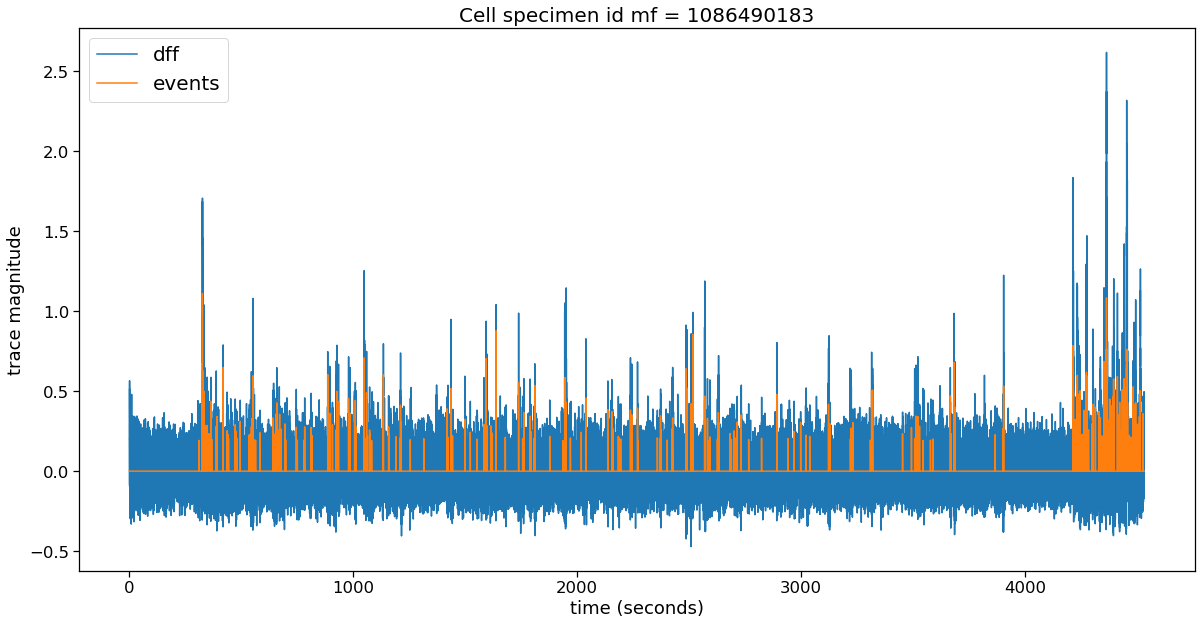

In [16]:
# plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell_specimen_idmf, 'dff'])
ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell_specimen_idmf, 'events'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('Cell specimen id mf = {}'.format(cell_specimen_idmf), fontsize = 20)
ax.legend(['dff', 'events'], fontsize = 20)

In [17]:
len(cell_specimen_idsmf)

14

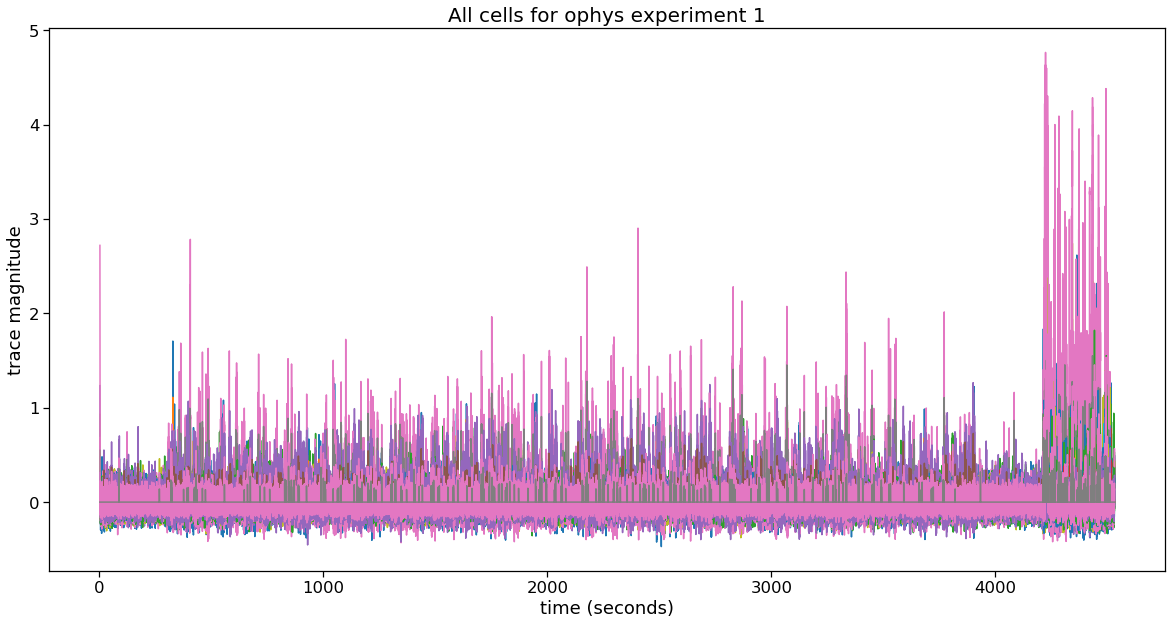

In [18]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf:
    ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 1', fontsize = 20)

### Male Familiar Experiment 2

In [19]:
ophys_experiment_idmf1 = plsmalesf.index[1]

datasetmf1 = cache.get_behavior_ophys_experiment(ophys_experiment_idmf1)
ophys_experiment_idmf1

1050720434

In [20]:
cell_specimen_idsmf1 = datasetmf1.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf1 = cell_specimen_idsmf1[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf1)) # print id

Cell specimen id mf = 1086611102


In [21]:
len(cell_specimen_idsmf1)

9

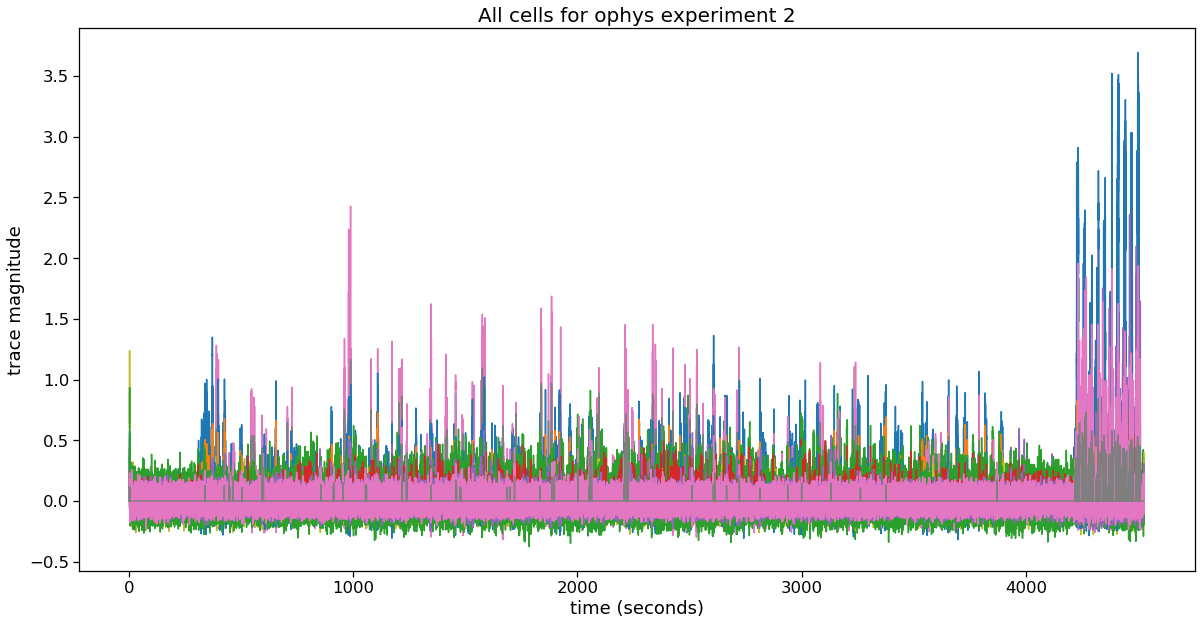

In [22]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf1:
    ax.plot(datasetmf1.ophys_timestamps, datasetmf1.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf1.ophys_timestamps, datasetmf1.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 2', fontsize = 20)

### Male Familiar Experiment 3

In [23]:
ophys_experiment_idmf2 = plsmalesf.index[2]

datasetmf2 = cache.get_behavior_ophys_experiment(ophys_experiment_idmf2)
ophys_experiment_idmf2

1081264133

In [24]:
cell_specimen_idsmf2 = datasetmf2.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf2 = cell_specimen_idsmf2[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf2)) # print id

Cell specimen id mf = 1120089939


In [25]:
len(cell_specimen_idsmf2)

6

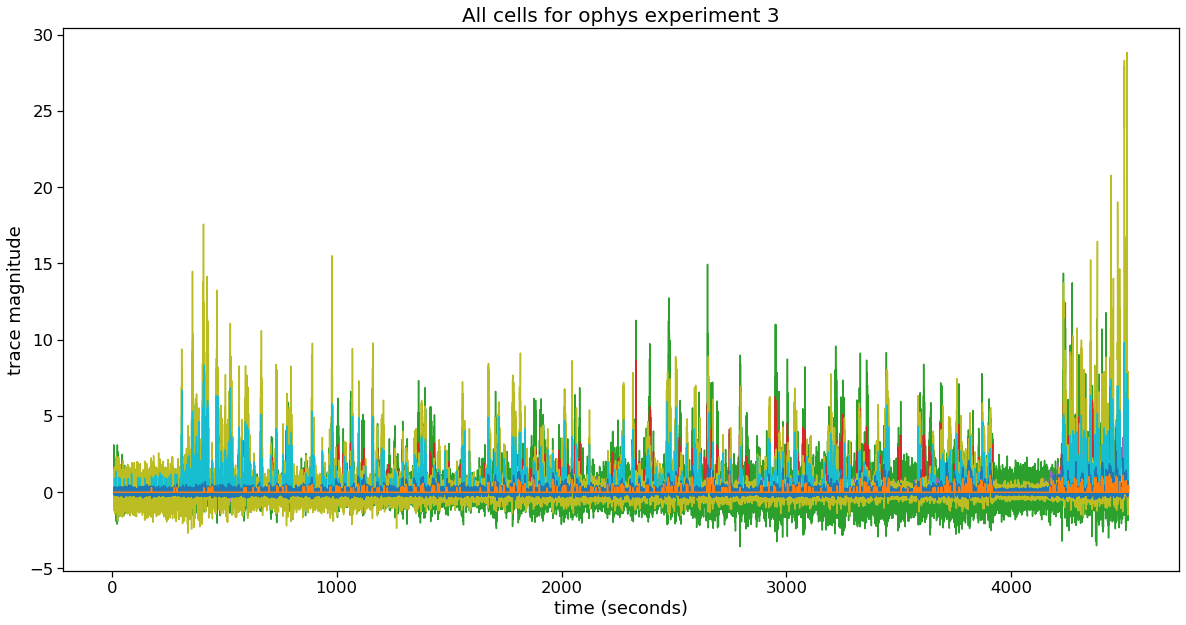

In [26]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf2:
    ax.plot(datasetmf2.ophys_timestamps, datasetmf2.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf2.ophys_timestamps, datasetmf2.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 3', fontsize = 20)

### Male Familiar Experiment 4

In [27]:
ophys_experiment_idmf3 = plsmalesf.index[3]

datasetmf3 = cache.get_behavior_ophys_experiment(ophys_experiment_idmf3)
ophys_experiment_idmf3

1081264129

In [28]:
cell_specimen_idsmf3 = datasetmf3.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf3 = cell_specimen_idsmf3[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf3)) # print id

Cell specimen id mf = 1120091421


In [29]:
len(cell_specimen_idsmf3)

11

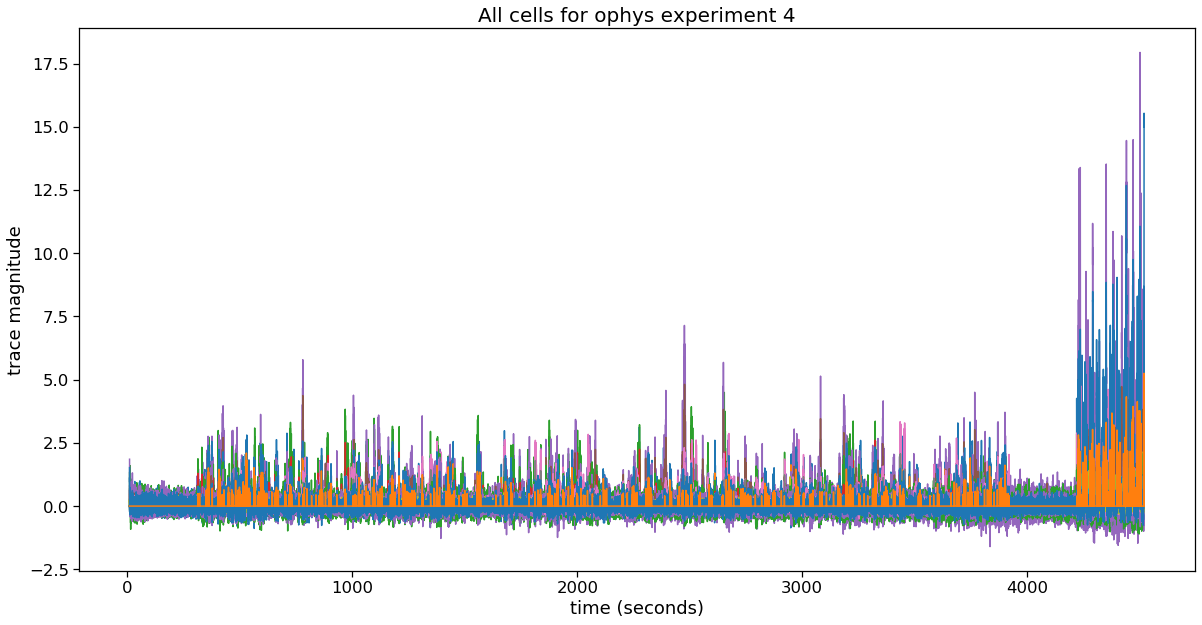

In [30]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf3:
    ax.plot(datasetmf3.ophys_timestamps, datasetmf3.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf3.ophys_timestamps, datasetmf3.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 4', fontsize = 20)

### Male Familiar Experiment 5

In [31]:
ophys_experiment_idmf4 = plsmalesf.index[4]

datasetmf4 = cache.get_behavior_ophys_experiment(ophys_experiment_idmf4)
ophys_experiment_idmf4

1007929142

In [32]:
cell_specimen_idsmf4 = datasetmf4.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf4 = cell_specimen_idsmf4[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf4)) # print id

Cell specimen id mf = 1086491370


In [33]:
len(cell_specimen_idsmf4)

10

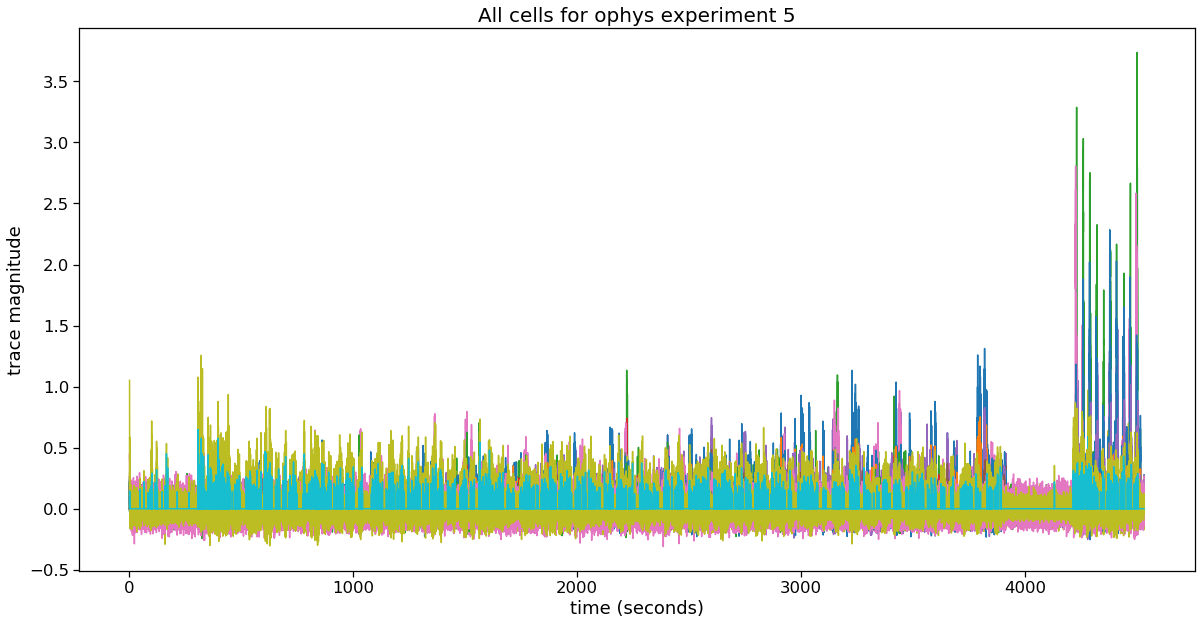

In [34]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf4:
    ax.plot(datasetmf4.ophys_timestamps, datasetmf4.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf4.ophys_timestamps, datasetmf4.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 5', fontsize = 20)

### All Male Familiar Traces Laid on One Plot

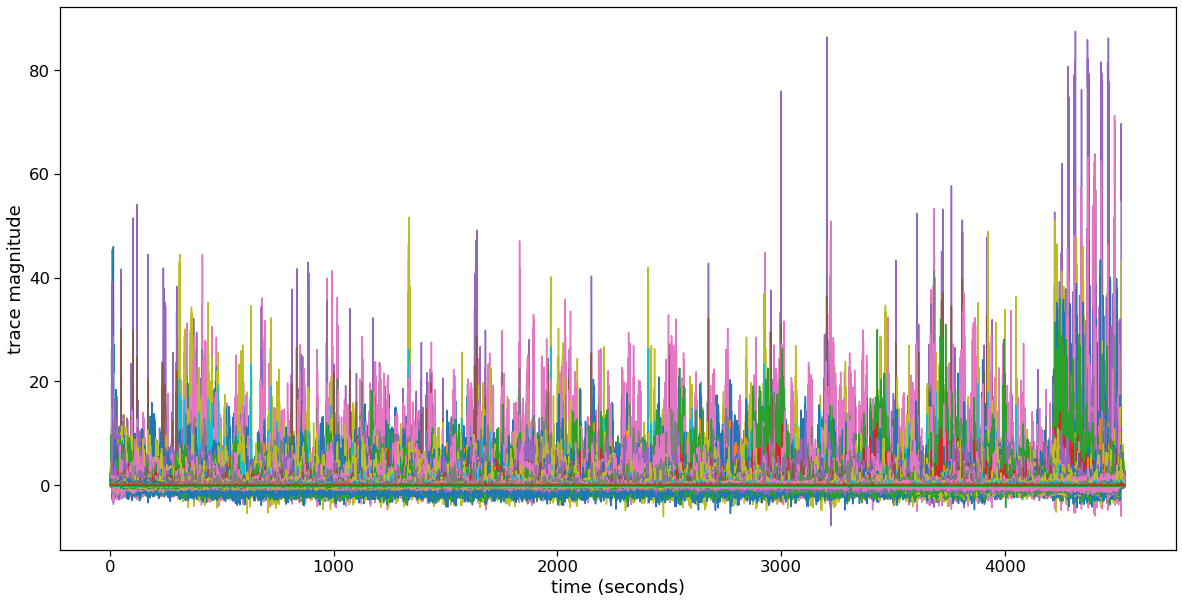

In [36]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_mf)):
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

### Male Novel 

In [37]:
plsmales5 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales6 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsmales7 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales8 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# males novel total is plsmales5 + plsmales6 + plsmales7 + plsmales8

plsmalesn = pd.concat([plsmales5, plsmales6], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales7], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales8], axis=0)
            
plsmalesn.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
995622557,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,203.0,Sst-IRES-Cre,GCaMP6f,5.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-20 18:26:12.000000,OPHYS_5_images_A_passive,Novel >1,True,A,995659072
993593393,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,485688,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,5.0,...,989461845,VisualBehaviorTask1B,275,VISp,2019-12-10 17:38:29.000000,OPHYS_5_images_A_passive,Novel >1,True,A,993634306
982862427,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,477202,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,165.0,Sst-IRES-Cre,GCaMP6f,5.0,...,975371413,VisualBehaviorTask1B,275,VISp,2019-11-14 20:10:30.000000,OPHYS_5_images_A_passive,Novel >1,True,A,982976718
1012112426,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,498972,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,152.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1006386845,VisualBehaviorTask1B,275,VISp,2020-03-03 18:24:50.000000,OPHYS_5_images_A_passive,Novel >1,True,A,1012177053
1003456269,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489056,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,177.0,Sst-IRES-Cre,GCaMP6f,6.0,...,999191979,VisualBehaviorTask1B,275,VISp,2020-01-28 19:38:04.000000,OPHYS_5_images_A_passive,Novel >1,False,A,1003552807


In [38]:
new_mn = plsmalesn.index
for index in new_mn:
    print(index)

995622557
993593393
982862427
1012112426
1003456269
990381322
965930965
1051989532
1082434498
1008738092
1083519876
1044446322
1077978610
1077978613
1077978611
1077978608
873963889
873963891
986518847
986518852
986518858
853988430
853988437
1085229176
939319851
969809655
965228771
830700800
946513782
946513780
940433468
940433466
940433470
853362765
853362771
891108758
891108765
891108763
891108760
949723709
949723713
949723715
922122728
922122730
922122734
929653466
929653468
807753318


### All Male Novel Traces Laid on One Plot

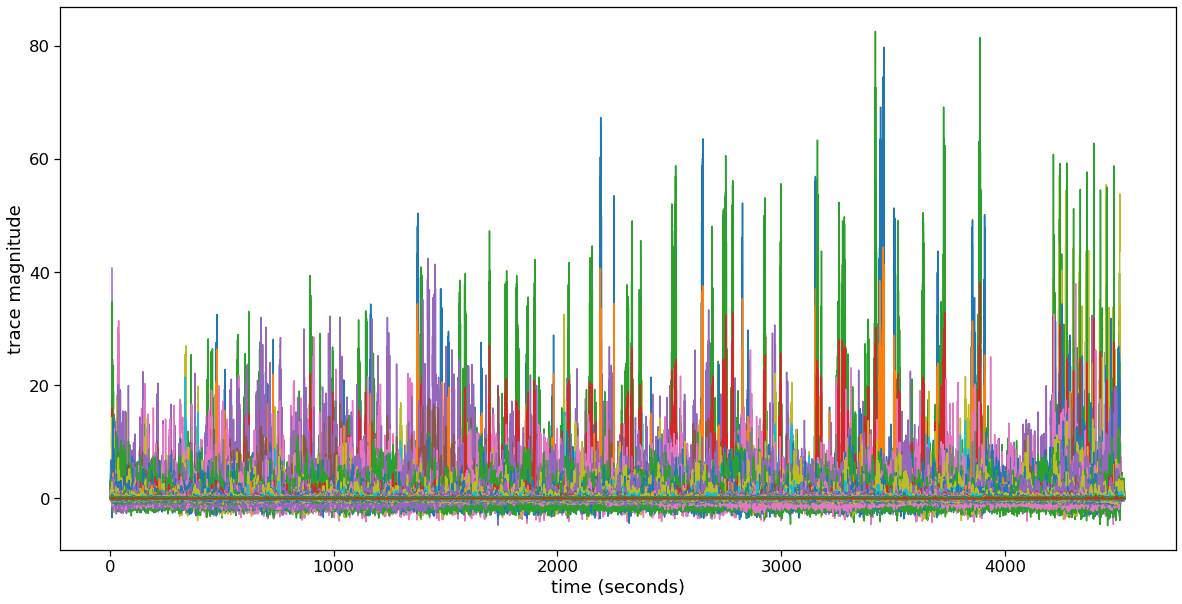

In [39]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_mn)):
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

### Female Familiar

In [40]:
plsfemales1 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales2 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsfemales3 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales4 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# females familiar total is plsfemales1 + plsfemales2 + plsfemales3 + plsfemales4

plsfemalesf = pd.concat([plsfemales1, plsfemales2], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales3], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales4], axis=0)
            
plsfemalesf.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659743,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012706
953659745,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012793
956903375,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,150.0,Sst-IRES-Cre,GCaMP6f,2.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-09-26 17:34:33.000000,OPHYS_2_images_B_passive,Familiar,True,B,957356891
798404219,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,156.0,Vip-IRES-Cre,GCaMP6f,2.0,...,791352433,VisualBehavior,175,VISp,2018-12-18 23:26:29.000000,OPHYS_2_images_A_passive,Familiar,True,A,859888258
1066177684,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,538219,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,167.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1064333290,VisualBehavior,175,VISp,2020-11-25 16:08:44.000000,OPHYS_2_images_A_passive,Familiar,True,A,1066218438


In [41]:
new_ff = plsfemalesf.index
for index in new_ff:
    print(index)

953659743
953659745
956903375
798404219
1066177684
1053774037
1052412559
943134119
993590480
1004136930
1004136916


### All Female Familiar Traces Laid on One Plot

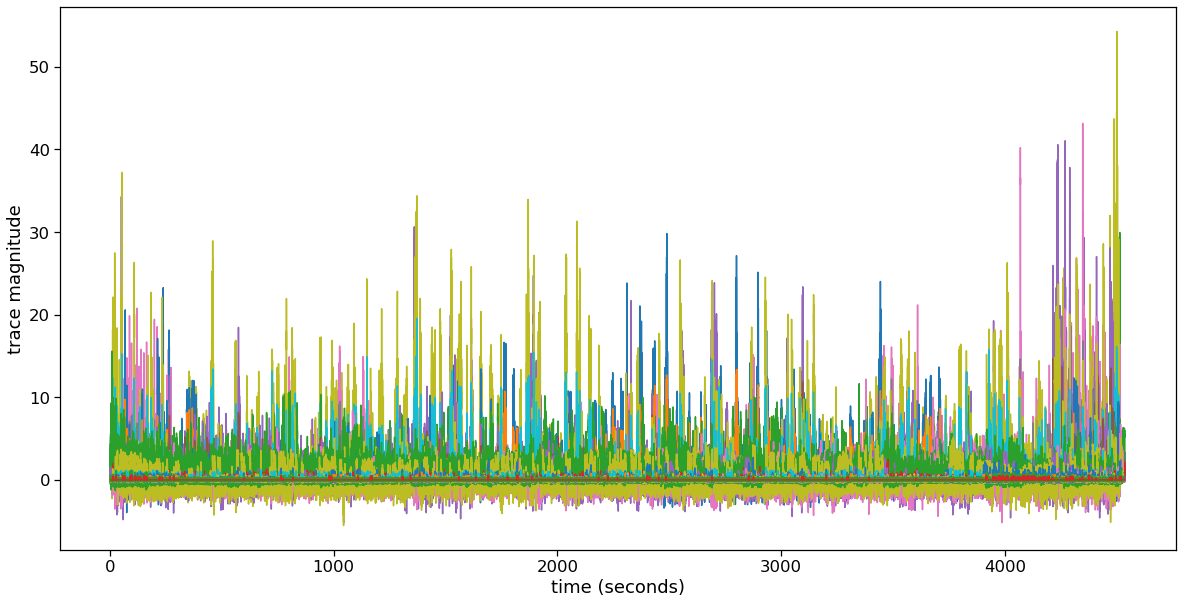

In [42]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_ff)):
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

### Female Novel 

In [43]:
plsfemales5 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales6 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsfemales7 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales8 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# females novel total is plsfemales5 + plsfemales6 + plsfemales7 + plsfemales8

plsfemalesn = pd.concat([plsfemales5, plsfemales6], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales7], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales8], axis=0)
            
plsfemalesn.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
960351917,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,156.0,Sst-IRES-Cre,GCaMP6f,5.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-10-02 18:23:56.000000,OPHYS_5_images_A_passive,Novel >1,True,A,960425985
959388790,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012436
959388792,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012475
959388788,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012491
994053909,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,130.0,Vip-IRES-Cre,GCaMP6f,5.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-12 17:15:46.000000,OPHYS_5_images_A_passive,Novel >1,True,A,994100291


In [44]:
new_fn = plsfemalesn.index
for index in new_fn:
    print(index)

960351917
959388790
959388792
959388788
994053909
994956406
1006813726
796108483
1069286458
1068173247
1054266228
1056171522
958435448


### All Female Novel Traces Laid on One Plot

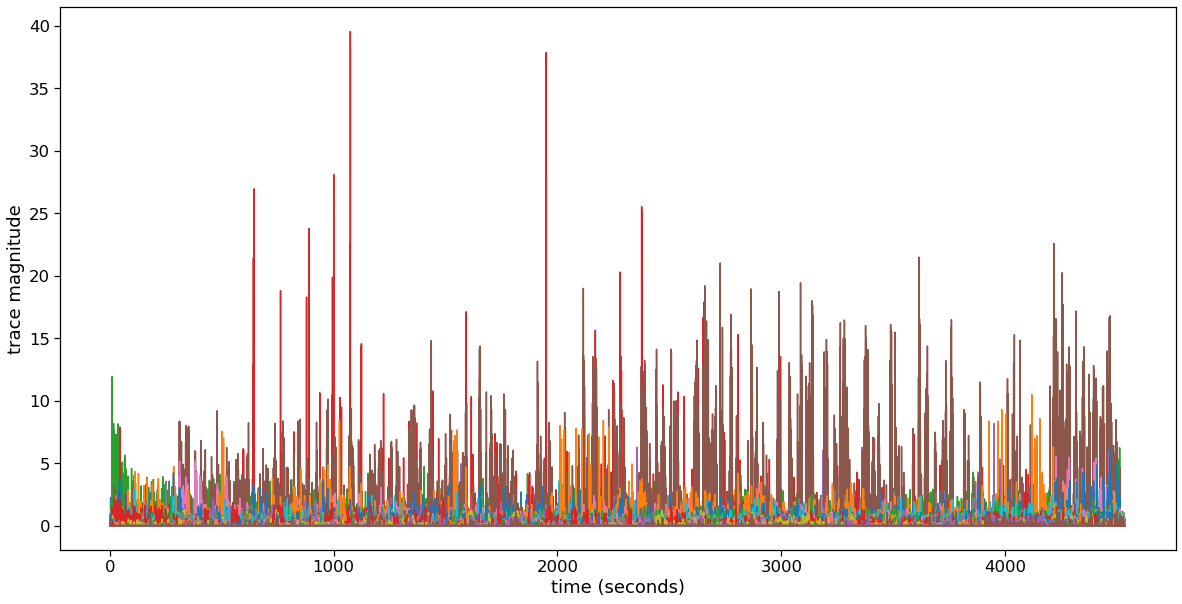

In [45]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_fn)):
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        #ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

Are events more important than the dff traces?

### An average trace of events of all cells for each experiment for 

No handles with labels found to put in legend.


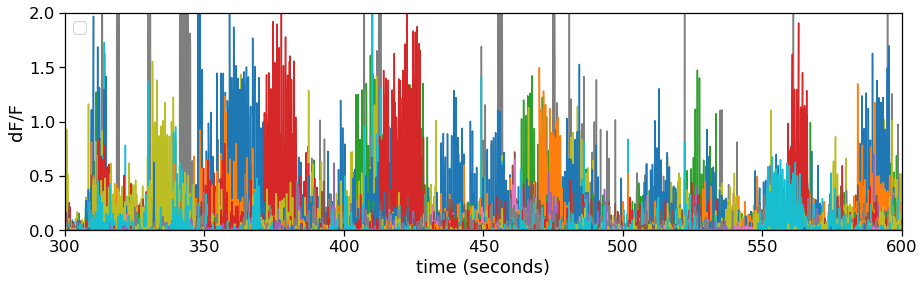

In [107]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mf)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for males familiar

No handles with labels found to put in legend.


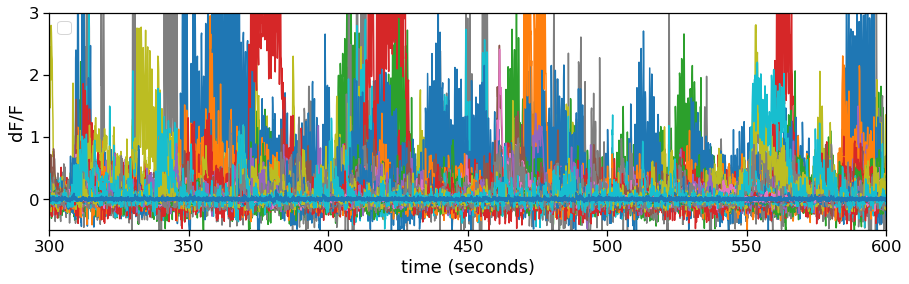

In [108]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mf)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### An average trace of events of all cells for each experiment for males novel 

No handles with labels found to put in legend.


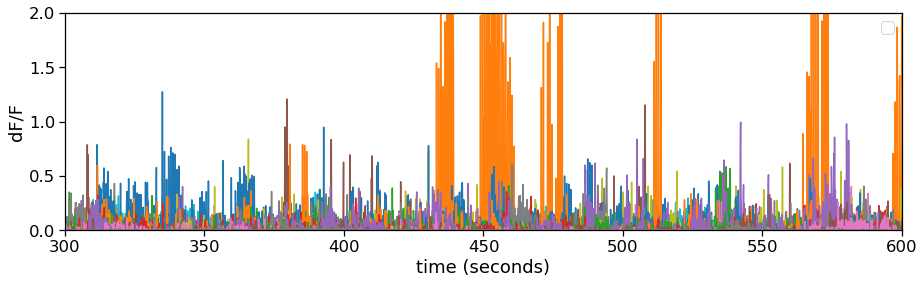

In [109]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mn)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for males novel 

No handles with labels found to put in legend.


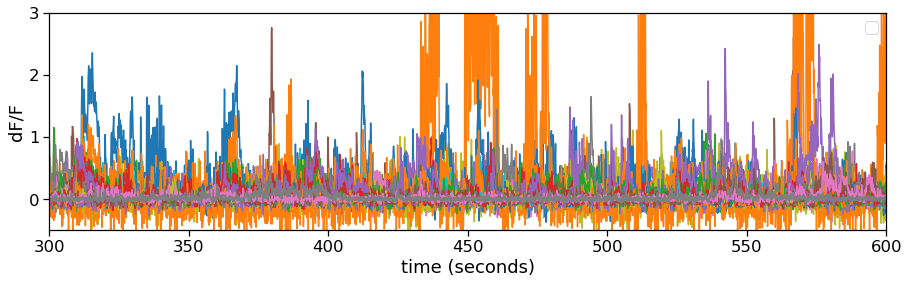

In [110]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_mn)): 
    # get the dataset object
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### An average trace of events of all cells for each experiment for females familiar

No handles with labels found to put in legend.


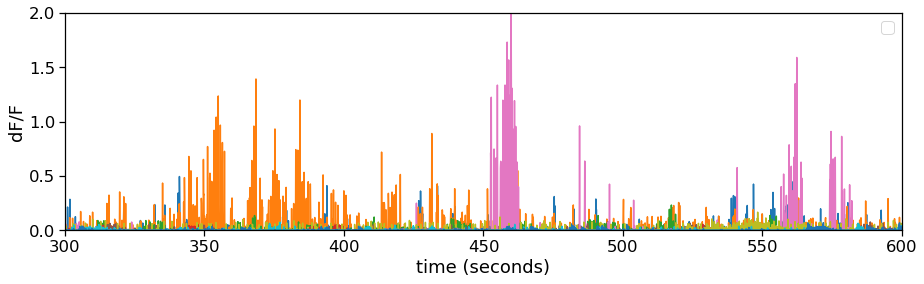

In [111]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_ff)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for females familiar

No handles with labels found to put in legend.


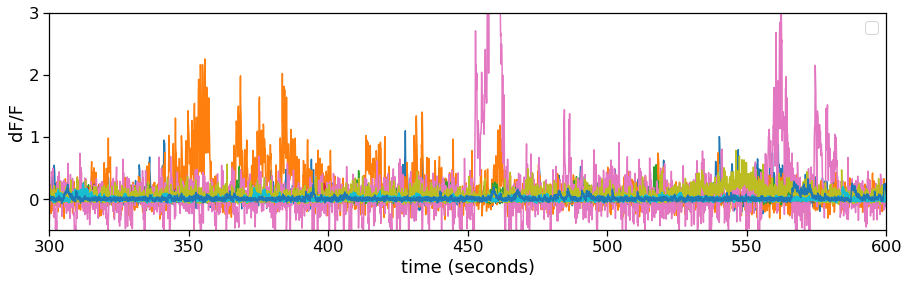

In [112]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_ff)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### An average trace of events of all cells for each experiment for females novel

No handles with labels found to put in legend.


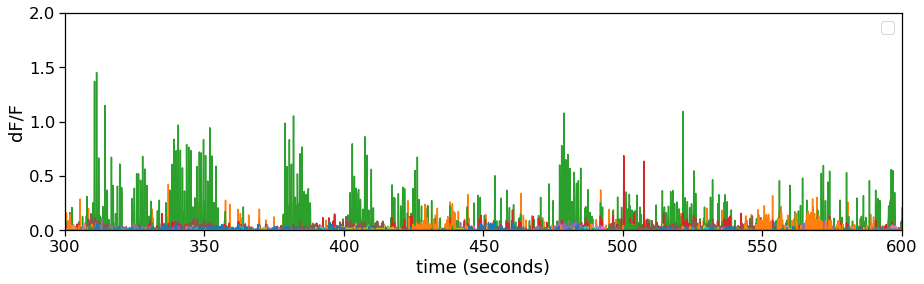

In [104]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_fn)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for female novel 

No handles with labels found to put in legend.


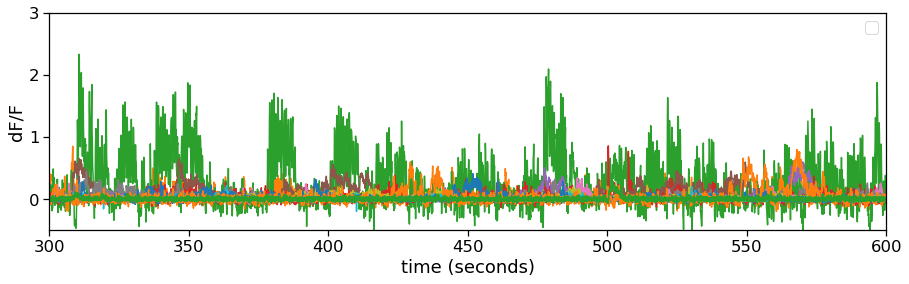

In [102]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_fn)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()